# Esther Wanangachi Lwazi

## Experiments Using the SIS Network Epidemic Model

$\textbf{Note}:$ The same code was used all social networks, I was just changing the datasets and record the results.

In [1]:
#importing packages to be used in the experiments
%pylab inline
import numpy as np
import scipy.linalg as lg
import networkx as nx
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import scipy.special
from numpy.random import seed
from scipy.stats import pearsonr# seed random number generator
seed(1)
import pandas as pd
sns.set()
warnings.filterwarnings("ignore")


Populating the interactive namespace from numpy and matplotlib


## Netowrk of Email Iteracting Amongest Enron Staff

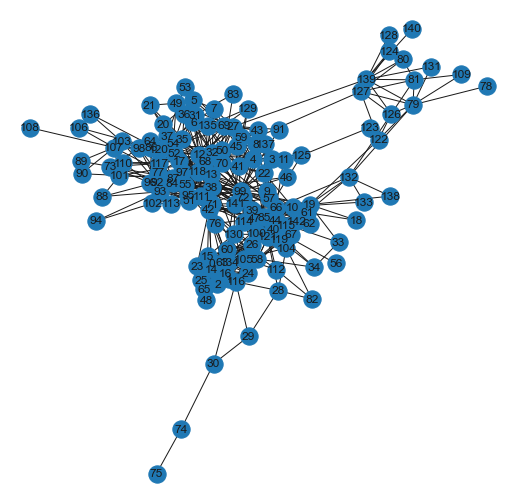

In [2]:
## assigning the dataset to variable G, and visualisation of the network
G=nx.read_weighted_edgelist('Enron.txt')
A=nx.to_numpy_matrix(G)
G=nx.from_numpy_matrix(A)
plt.figure(figsize=(9,9))
nx.draw_networkx(G)
plt.axis('off')
plt.savefig("pth2.png")
plt.show()

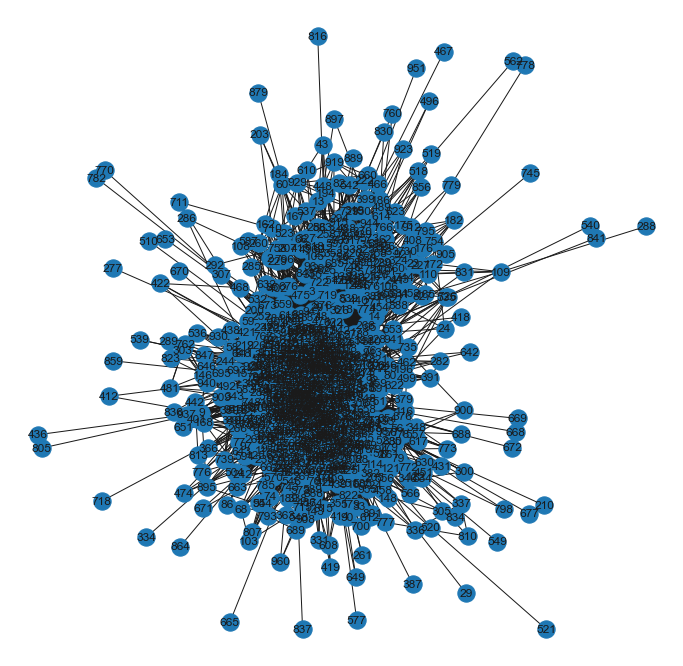

In [3]:
## assigning the dataset to variable F, and visualisation of the network

F=nx.read_weighted_edgelist('FB_Reed.txt')
N=nx.to_numpy_matrix(F)
F=nx.from_numpy_matrix(N)
plt.figure(figsize=(12,12))
nx.draw_networkx(F)
plt.axis('off')
plt.savefig("pth2.png")
plt.show()

## Number of nodes and Edges

In [4]:
#Enron data
num=nx.number_of_nodes(G)
print("Number of nodes: ",num)
edg=nx.number_of_edges(G)
print("Number of Edges: ",edg)

Number of nodes:  143
Number of Edges:  623


In [5]:
#facebook data
num=nx.number_of_nodes(F)
print("Number of nodes: ",num)
edg=nx.number_of_edges(F)
print("Number of Edges: ",edg)

Number of nodes:  962
Number of Edges:  18812


## Degrees of nodes

In [6]:
D=[val for (node, val) in F.degree()]

In [7]:
max(D)

313

In [8]:
min(D)

1

### Email-Enron

In [9]:
D2=[val for (node, val) in G.degree()]

In [10]:
max(D2)

42

In [11]:
min(D2)

1

## Finding average number of degrees

In [12]:
average_DegF=sum(D)/len(N)

In [13]:
round(average_DegF) #average number of nodes in Reed facebook

39

In [14]:
average_DegG=sum(D2)/len(A)

In [15]:
round(average_DegG)#average number of nodes in Enron_Email

9

### Finding $P_2$, number of path graph of length $2$ in Reed-Facebook data
\begin{align}
P_2=\dfrac{1}{2}\sum_{i=1}^{n}m_i(m_i-1),
\end{align}
Where $m_i$ is degree of node $i=1,2,...,n$ 

In [16]:
P_2=[]
for i in D:
    g=scipy.special.binom(i,2)
    P_2.append(g)
Sum_P_2=sum(P_2)

print('The network has',Sum_P_2, 'paths of length 2.')


The network has 1320357.0 paths of length 2.


### Finding $P_2$, number of path graph of length  $2$ in Email-Enron


In [17]:
Pa_2=[]
for i in D2:
    c=scipy.special.binom(i,2)
    Pa_2.append(c)
Sum_Pa_2=sum(Pa_2)
print('The network has',Sum_Pa_2, 'paths of length 2.')


The network has 7427.0 paths of length 2.


## Number of closed walks of length $3$, $C_3$

\begin{align}
C_3=\dfrac{1}{6}\text{tr}(M^3)
\end{align}

where $M$ is an adjacency matrix


### Enron data


In [18]:

A_1=A**3 #matrix for walk of length 3

In [19]:
TraceA=int(A_1.trace())
print(TraceA)


5334


In [20]:
numberofT=TraceA/6
print(numberofT)

889.0


### Facebook data

In [21]:

A_2=N**3 #matrix for walk of length 3
#A_2

In [22]:
TraceN=int(A_2.trace())
print(TraceN)


582822


In [23]:
numberofT2=TraceN/6
print(int(numberofT2))

97137


## Newman Clustering Coefficient

\begin{align}
C=\dfrac{3|C_3|}{|P_2|},
\end{align}

### Enron Data

In [24]:
C_Enron=(numberofT*3)/Sum_Pa_2
print(C_Enron)

0.3590951932139491


### Facebook Data

In [25]:
C_Enron2=(numberofT2*3)/Sum_P_2
print(C_Enron2)

0.2207062180910163


## Degree Distribution

### Plots of degrees

Text(0, 0.5, 'Frequency')

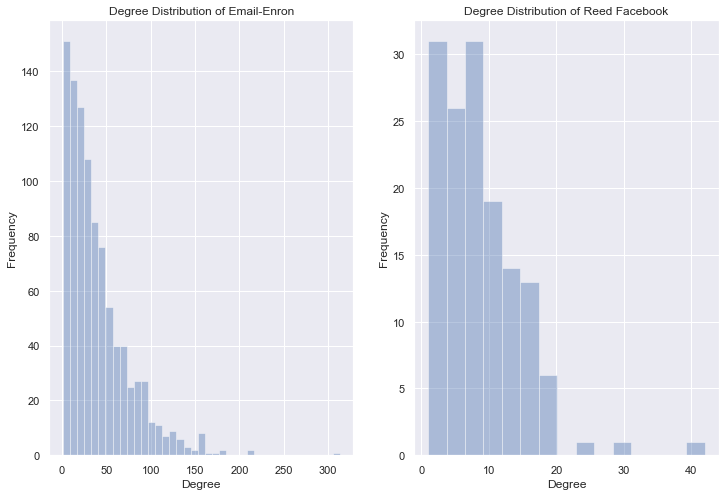

In [26]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1) # Plot the following in 1st position on a 1 by 2 grid
deg=pd.DataFrame(F.degree(),columns=['Node','Degree'])
sns.distplot(a=deg['Degree'],kde=False)
plt.title('Degree Distribution of Email-Enron')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.subplot(1,2,2) # Plot the following in 1st position on a 1 by 2 grid
degrees=pd.DataFrame(G.degree(),columns=['Node','Degree'])
sns.distplot(a=degrees['Degree'],kde=False)
plt.xlabel("Degree")
plt.title('Degree Distribution of Reed Facebook')
plt.ylabel("Frequency")

##  Function Definition of the SIS-model (used for Email-Enron)

## $A$ is the adjacency matrix, $I$-fraction of infection, $\mu$ recovery rate, $\beta$ infection

In [27]:
def epi_step(A, I, n, mu, beta):
    
    S = np.zeros(n)              #create a n dimensional vector with zero elements
    
    for i in range(n):
        
        z = 1
        
        for j in range(n):
            
            z = z*(1-beta*A[i,j]*I[j]) #create a new value of z
            
        S[i] = (1-I[i])*z+mu*I[i]*z #number of susceptible individuals 
        
    I = 1-S# average number of infected individuals 
    return I

In [28]:
## returns number average number of infection at a particular time
def trial(A, mu, beta, t, init):
    t = np.zeros(m)
    n = len(A)
    I=init
    for i in range(m):
        t[i] = sum(I)
        I = epi_step(A, I, n, mu, beta)
    return t,I

## Using Degre centrality to identify the most central node

In [29]:
m=20
mu=1.0  #recovery rate
beta=.3  #infection rate

In [30]:
dicdc=nx.degree_centrality(G) #calculating degree centrality

In [31]:
all_valuesdc = dicdc.values()
sortdc=sorted(list(all_valuesdc))


In [32]:
max_valuedc = max(all_valuesdc)#maximum entrality
max_valuedc

0.29577464788732394

In [33]:
keysdc = [k for k, v in dicdc.items() if v == max_valuedc]#node with maximum centrality
print(keysdc)

[99]


In [34]:
initdc = np.zeros(len(A))
initdc[keysdc] = 1 #initialising, the initial infection
#print(initdc)
tdc,pdc1 = trial(A, mu, beta, m, initdc) #function call of number of infection at particular time

## Least node using all centrality measures

In [35]:
#Minimum of DC
min_valuedc = min(all_valuesdc)
min_valuedc

0.007042253521126761

In [36]:
keymin = [k for k, v in dicdc.items() if v == min_valuedc]
print(keymin) #nodes with minimum

[56, 75, 78, 108, 128, 140]


In [37]:
#betweeness centrality
dz1=nx.betweenness_centrality(G)
all_va1 = dz1.values()
min_dz1 = min(all_va1)
min_dz1

0.0

In [38]:
key1= [k for k, v in dz1.items() if v == min_dz1]
print(key1) #nodes with minmum centralities

[18, 46, 48, 56, 75, 78, 89, 90, 94, 106, 108, 109, 124, 128, 131, 133, 136, 140]


In [39]:
#closeness centrality
dz2=nx.closeness_centrality(G)

all_va2 = dz2.values()
min_dz2 = min(all_va2)
min_dz2

0.16884661117717004

In [40]:
key2= [k for k, v in dz2.items() if v == min_dz2]
print(key2)#minimum centrality

[75]


In [41]:
dz3=nx.betweenness_centrality(G)

all_va3 = dz3.values()
min_dz3 = min(all_va3)
min_dz3

0.0

In [42]:
key3= [k for k, v in dz3.items() if v == min_dz3]
print(key3)

[18, 46, 48, 56, 75, 78, 89, 90, 94, 106, 108, 109, 124, 128, 131, 133, 136, 140]


In [43]:
initmin = np.zeros(len(A))
initmin[75] = 1
#print(initmin)
tmin,pdc1 = trial(A, mu, beta, m, initmin)

## Facebook model

## $N$ is the adjacency matrix, $I1$-fraction of infection, $\mu$ recovery rate, $\beta$ infection

In [44]:
def epi_step1(N, I1, n1, mu, beta):
    
    S = np.zeros(n1)              #create a n dimensional vector with zero elements
    
    for i in range(n1):
        
        z = 1
        
        for j in range(n1):
            
            z = z*(1-beta*N[i,j]*I1[j]) #create a new value of z
            
        S[i] = (1-I1[i])*z+mu*I1[i]*z #number of susceptible individuals 
        
    I1 = 1-S# number of infected individuals 
    return I1

In [45]:
def trial1(N, mu, beta, t, init):
    t = np.zeros(m)
    n1 = len(N)
    I1=init
    for i in range(m):
        t[i] = sum(I1)
        I1 = epi_step1(N, I1, n1, mu, beta)
    return t,I1

In [46]:
m=20
mu=1.0
beta=.1

In [47]:
dicdc1=nx.degree_centrality(F)

In [48]:
## extracting values from the dictionary and sort them
all_valuesdc1 = dicdc1.values()
sortdc1=sorted(list(all_valuesdc1))
#print(sortdc1)


In [49]:
# maximum centrality 
max_valuedc1 = max(all_valuesdc1)
max_valuedc1

0.32570239334027057

In [50]:
# Keys of the dictionary are nodes, this will return the key for the maximum centrality
keysdc1 = [k for k, v in dicdc1.items() if v == max_valuedc1]
print(keysdc1)

[667]


In [51]:
# The initial infection is the node with the highest centrality
initdc1 = np.zeros(len(N))
initdc1[keysdc1] = 1
#print(initdc1)
tdc1,pdc1 = trial1(N, mu, beta, m, initdc1)
tdc = [round(i) for i in tdc]


## Least node using all centrality measures

In [52]:
## finding minimum degree centrality
min_valuedc1 = min(all_valuesdc1)
min_valuedc1

0.001040582726326743

In [53]:
keymin1 = [k for k, v in dicdc1.items() if v == min_valuedc1]
print(keymin1)

[29, 210, 277, 288, 334, 387, 436, 467, 510, 521, 540, 549, 562, 577, 653, 665, 668, 669, 670, 672, 677, 718, 745, 770, 778, 782, 805, 816, 834, 837, 841, 859, 864, 879, 951]


In [54]:
## finding minimum betweenness centrality
 
dz1=nx.betweenness_centrality(F)
all_va1 = dz1.values()
min_dz1 = min(all_va1)
min_dz1

0.0

In [55]:
key1= [k for k, v in dz1.items() if v == min_dz1]
print(key1)


[29, 90, 210, 261, 277, 286, 288, 289, 300, 305, 334, 387, 412, 418, 436, 467, 474, 496, 510, 519, 521, 539, 540, 549, 562, 577, 642, 649, 653, 665, 668, 669, 670, 671, 672, 677, 688, 711, 718, 745, 770, 778, 782, 798, 805, 807, 816, 834, 837, 841, 859, 864, 879, 889, 905, 951, 960]


In [56]:
## finding minimum closeness centrality
dz2=nx.closeness_centrality(F)
all_va2 = dz2.values()
min_dz2 = min(all_va2)
min_dz2


0.23536615233896643

In [57]:
key2= [k for k, v in dz2.items() if v == min_dz2]
print(key2)


[562]


In [58]:
## finding minimum eigenvector centrality

dz3=nx.eigenvector_centrality(F)

all_va3 = dz3.values()
min_dz3 = min(all_va3)
min_dz3

4.61792768756726e-06

In [59]:
key3= [k for k, v in dz3.items() if v == min_dz3]
print(key3)

[562]


In [60]:
initmin1 = np.zeros(len(N))
initmin1[562] = 1
#print(initmin1)
tmin1,pdc1 = trial1(N, mu, beta, m, initmin1)
tmin1 = [round(i) for i in tmin1]


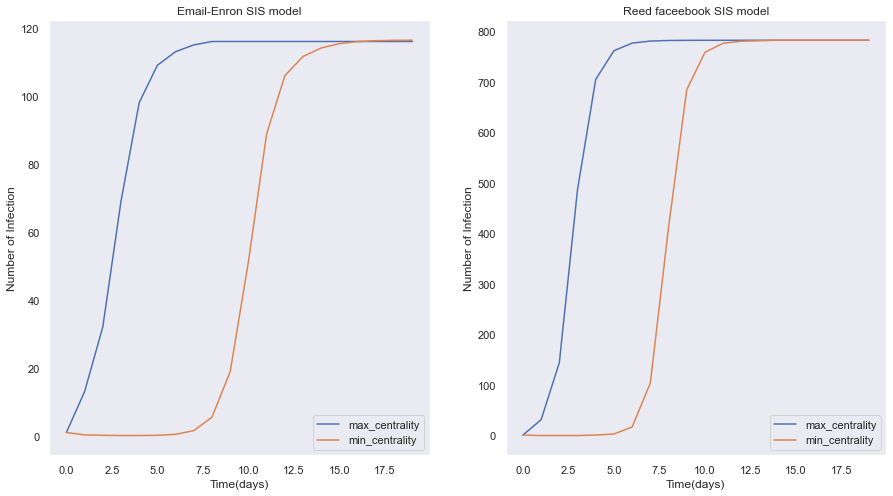

In [61]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1) # Plot the following in 1st position on a 1 by 2 grid
plt.plot(range(m),tdc , range(m),tmin)
plt.xlabel("Time(days)")    # set the x-label
plt.ylabel("Number of Infection") # Set the y-label
plt.title("Email-Enron SIS model")                    # set the title
plt.legend(['max_centrality','min_centrality'])
plt.grid()
plt.subplot(1,2,2) # Plot the following in 2st position on a 1 by 2 grid
plt.plot(range(m),tdc1 , range(m),tmin1)
plt.xlabel("Time(days)")    # set the x-label
plt.ylabel("Number of Infection") # Set the y-label
plt.title("Reed faceebook SIS model")                    # set the title
plt.legend(['max_centrality','min_centrality'])
plt.grid()

### Time taken to reach maximum number of infection in Email-Enron

In [62]:
#Time of the node with maximum centrality

tdc = [round(i) for i in tdc]
max_tdc=0
for i in range(m):
    if tdc[i]==max(tdc):
        max_tdc = max_tdc+i
        break
print(max_tdc)           

8


In [63]:
max(tdc) ##maximum infection

116

In [64]:
#Time of the node with minimum centrality

tmin= [round(i) for i in tmin]

max_tmin=0
for i in range(m):
    if tmin[i]==max(tdc):
        max_tmin = max_tmin+i
        break
print(max_tmin)           

16


### Time taken to reach maximum number of infection in Reed Facebook

In [65]:
#Time of the node with maximum centrality

tdc1 = [round(i) for i in tdc1]
max_tdc1=0
for i in range(m):
    if tdc1[i]==max(tdc1):
        max_tdc1 = max_tdc1+i
        break
print(max_tdc1)           

9


In [66]:
#Time of the node with minimum centrality
tmin1= [round(i) for i in tmin1]

max_tmin1=0
for i in range(m):
    if tmin1[i]==max(tdc1):
        max_tmin1 = max_tmin1+i
        break
print(max_tmin1)           

14


In [67]:
max(tdc1) #maximum infection for Reed-Facebook

783

## Time to Reach Maximum Infection In SI Model (SIS model with $\mu=0$)

In [68]:
m=20
mu=0
beta=0.3

### Time for maximum infection

In [69]:
list_of_time = []
for node_label in range(len(A)):
    initdc = np.zeros(len(A))
    initdc[node_label] = 1
    
    tdc,pdc1 = trial(A, mu, beta, m, initdc)
        
    tdc = [round(i) for i in tdc]
    max_infection = max(tdc)
    
    maxt2=0
    for j in range(m):
        if tdc[j]==max_infection:
            maxt2 = float(maxt2+j)
            break
            
    list_of_time.append(maxt2)

In [70]:
dicdc=nx.degree_centrality(G)
dc = list(dicdc.values())

In [71]:
x=np.array(dc)
y=np.array(list_of_time)

In [72]:
a, b = np.polyfit(x, y, 1)
print(a)
print(b)

-9.55708043916646
15.36965045933228


### Pearson Correlation Coefficient

In [73]:
#correlation coefficient
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.519


## Betweeness Centrality Against Time

In [74]:
dicbc=nx.betweenness_centrality(G)
bc = list(dicbc.values())
#bc

In [75]:
x1=np.array(bc)
y=np.array(list_of_time)

In [76]:
a1, b1 = np.polyfit(x1, y, 1)
print(a1)
print(b1)

-11.993836665840842
14.950535468364873


### Pearson Correlation Coefficient

In [77]:
#correlation coefficient

corr1, _ = pearsonr(x1, y)
print('Pearsons correlation: %.3f' % corr1)

Pearsons correlation: -0.390


## Eigenvector Centrality

In [78]:
dic_ev=nx.eigenvector_centrality(G)

In [79]:
ec = list(dic_ev.values())


In [80]:
x2=np.array(ec)
y=np.array(list_of_time)

In [81]:
a2, b2 = np.polyfit(x2, y, 1)
print(a2)
print(b2)

-4.467408946646912
15.055576257862583


### Pearson Correlation Coefficient

In [82]:
#correlation coefficient
corr2, _ = pearsonr(x2, y)
print('Pearsons correlation: %.3f' % corr2)

Pearsons correlation: -0.325


## Closeness Centrality

In [83]:
dicc=nx.closeness_centrality(G)

In [84]:
cc = list(dic_ev.values())


In [85]:
x3=np.array(cc)
y=np.array(list_of_time)

In [86]:
a3, b3 = np.polyfit(x3, y, 1)
print(a3)
print(b3)

-4.467408946646912
15.055576257862583


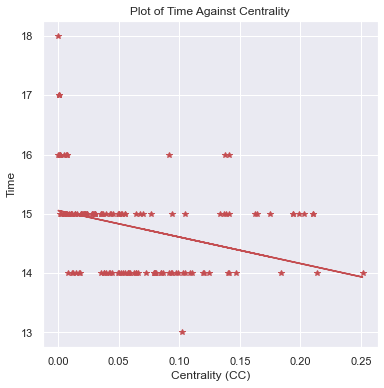

In [87]:
plt.figure(figsize=(6,6))
plt.plot(x3, y, 'r*')
plt.xlabel("Centrality (CC)")
plt.ylabel("Time")
plt.title("Plot of Time Against Centrality")
plt.plot(x3, a3*x3+b3, 'r')        

### Pearsons Correlation Coefficient

In [88]:
corr3, _ = pearsonr(x3, y)
print('Pearsons correlation: %.3f' % corr3)

Pearsons correlation: -0.325


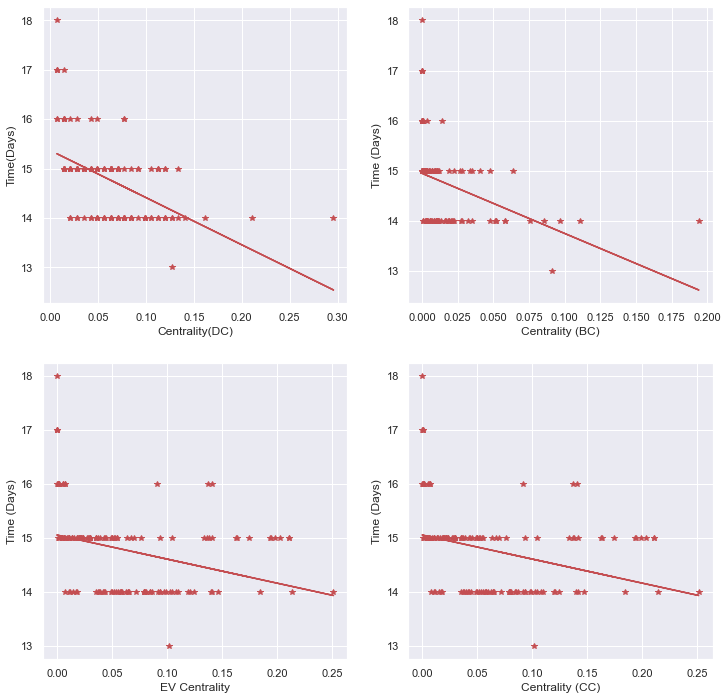

In [89]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1) # Plot the following in 1st position on a 1 by 2 grid
plt.plot(x, y, 'r*')
plt.xlabel("Centrality(DC)")
plt.ylabel("Time(Days)")
plt.plot(x, a*x+b,'r')        
plt.subplot(2,2,2) # Plot the following in 1st position on a 1 by 2 grid
plt.plot(x1, y, 'r*')
plt.xlabel("Centrality (BC)")
plt.ylabel("Time (Days)")
plt.plot(x1, a1*x1+b1, 'r')    
plt.subplot(2,2,3) # Plot the following in 2st position on a 1 by 2 grid
plt.plot(x2, y, 'r*')
plt.xlabel("EV Centrality")
plt.ylabel("Time (Days)")
plt.plot(x2, a2*x2+b2, 'r')        
plt.subplot(2,2,4) # Plot the following in 2st position on a 1 by 2 grid
plt.plot(x3, y, 'r*')
plt.xlabel("Centrality (CC)")
plt.ylabel("Time (Days)")
plt.plot(x3, a3*x3+b3, 'r')        

## Scatter plot for constant value $\beta$ and for different values of $\mu$

In [90]:
m=20
beta=0.1

In [91]:
list_of_time2 = []
list_mu=[]
for mu in linspace(0.0, 1.0, m):
    initdc = np.zeros(len(A))
    initdc[99] = 1
    
    tdc,pdc1 = trial(A, mu, beta, m, initdc)
        
    tdc = [round(i) for i in tdc]
    max_infection = max(tdc)
    
    maxt2=0
    for j in range(m):
        if tdc[j]==max_infection:
            maxt2 = float(maxt2+j)
            break
            
    list_of_time2.append(maxt2)
    list_mu.append(mu)

In [92]:
x4=np.array(list_mu)
y4=np.array(list_of_time2)

In [93]:
a4, b4 = np.polyfit(x4, y4, 1)
print(a4)
print(b4)

-0.28571428571429125
17.54285714285715


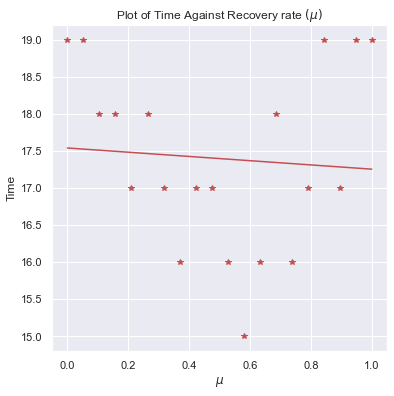

In [94]:
plt.figure(figsize=(6,6))
plt.plot(x4, y4, 'r*')
plt.xlabel("$\mu$")
plt.ylabel("Time")
plt.title("Plot of Time Against Recovery rate $(\mu)$")
plt.plot(x4, a4*x4+b4, 'r')        

In [95]:
#correlation coefficient
corr4, _ = pearsonr(x4, y4)
print('Pearsons correlation: %.3f' % corr4)

Pearsons correlation: -0.072


## Scatter plot for constant value $\mu$ and for different values of $\beta$

### Showing elationship between time and the parameters

In [96]:
m=20
mu=0.1#recovery rate

In [97]:
list_of_time3 = []
list_beta=[]
for beta in linspace(0.0, 1.0, m):
    initdc = np.zeros(len(A))
    initdc[99] = 1
    
    tdc,pdc1 = trial(A, mu, beta, m, initdc)
        
    tdc = [round(i) for i in tdc]
    max_infection = max(tdc)
    
    maxt2=0
    for j in range(m):
        if tdc[j]==max_infection:
            maxt2 = float(maxt2+j)
            break
            
    list_of_time3.append(maxt2)
    list_beta.append(beta)

In [98]:
x5=np.array(list_beta)
y5=np.array(list_of_time3)

In [99]:
a5, b5 = np.polyfit(x5, y5, 1)
print(a5)
print(b5)

-9.171428571428578
14.08571428571429


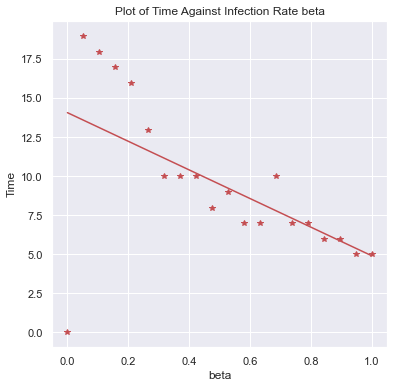

In [100]:
plt.figure(figsize=(6,6))
plt.plot(x5, y5, 'r*')
plt.xlabel("beta")
plt.ylabel("Time")
plt.title("Plot of Time Against Infection Rate beta")
plt.plot(x5, a5*x5+b5, 'r')      

In [101]:
#correlation coefficient
corr5, _ = pearsonr(x5, y5)
print('Pearsons correlation: %.3f' % corr5)

Pearsons correlation: -0.582


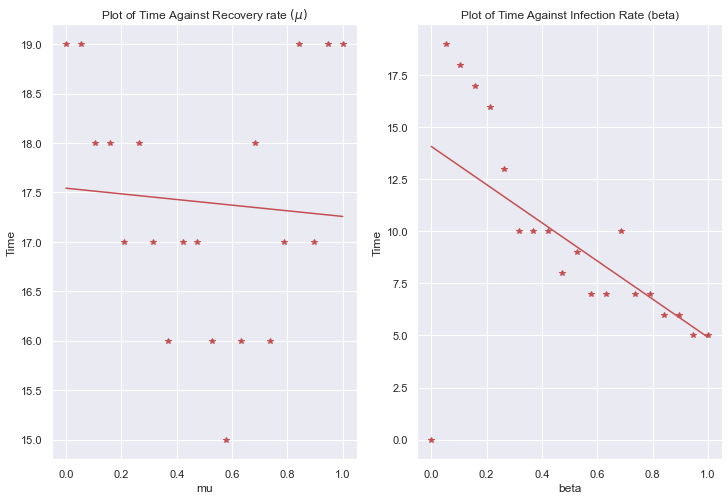

In [102]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1) # Plot the following in 1st position on a 1 by 2 grid
plt.plot(x4, y4, 'r*')
plt.xlabel("mu")
plt.ylabel("Time")
plt.title("Plot of Time Against Recovery rate $(\mu)$")
plt.plot(x4, a4*x4+b4, 'r')        
plt.subplot(1,2,2) # Plot the following in 2st position on a 1 by 2 grid
plt.plot(x5, y5, 'r*')
plt.xlabel("beta")
plt.ylabel("Time")
plt.title("Plot of Time Against Infection Rate (beta)")
plt.plot(x5, a5*x5+b5, 'r')      

## References
1. https://arxiv.org/pdf/2001.02436.pdf
2. https://networkx.org/documentation/stable/tutorial.html
